## 4 state clock model 
The hamiltonian for a 2 component spin $\vec{\sigma_{i}} = \hat{x} \cos(\theta_{i}) + \hat{y}\sin(\theta_{i})$ model can be written as, 
\begin{eqnarray*}
H &=& - J \sum_{\langle ij \rangle} \vec{\sigma_{i}}.\vec{\sigma_{j}}\\
H &=& - J \sum_{\langle i j \rangle} \cos(\theta_{i})\cos(\theta_{j}) + \sin(\theta_{i}) \sin(\theta_{j}) \\
H &=& -J \sum_{\langle ij \rangle}\cos(\theta_{i}-\theta_{j})
\end{eqnarray*}
For a q state model $\theta_{n} = \frac{2 n \pi}{q}$ where $n=0,1,2,...,q-1$.

The random direction $(\hat{r})$ around which the vector is flipped is given by $\vec{r} = \hat{x}\cos(\delta) + \hat{y}\sin(\delta)$. Here the angle $\delta$ is given by $\delta = \frac{p \pi}{q}$ here $p = 0,1,2,...,2q-1$.


## Monte-Carlo Procedure
In the monte-carlo we pick a random direction and try to flip the spin along that direction if flipping the spin reduced the energy. The application of flipping a spin can be represented by a rotation matrix $ \mathcal{R}(\vec{r})$ and this can be written as,
\begin{eqnarray*}
\mathcal{R}(\vec{r})\vec{\sigma_{i}} &=& \vec{\sigma_{i}} - 2 (\vec{\sigma_{i}}.\vec{r})\vec{r} 
\end{eqnarray*}
One can simplify the second term as,
\begin{eqnarray*}
\vec{\sigma_{i}}.\vec{r} &=& \cos(\theta_{i})\cos(\delta) + \sin(\theta_{i}) \sin(\delta) \\
2 (\vec{\sigma_{i}}.\vec{r})\vec{r} &=& 2 \hat{x}(\cos(\theta_{i})\cos(\delta) + \sin(\theta_{i}) \sin(\delta))\cos(\delta) + 2 \hat{y}(\cos(\theta_{i})\cos(\delta) + \sin(\theta_{i}) \sin(\delta))\sin(\delta) \\
\vec{\sigma_{i}}^{\prime} &=& \mathcal{R}(\vec{r})\vec{\sigma_{i}}= \hat{x}\cos(\theta_{i}^{\prime}) + \hat{y}\sin(\theta_{i}^{\prime})
\end{eqnarray*}

Collecting terms component wise to get equation for updating variable $\theta_{i}$
\begin{eqnarray*}
\cos(\theta_{i}^{\prime}) &=& \cos(\theta_{i}) - 2 (\cos(\theta_{i})\cos(\delta) + \sin(\theta_{i})\sin(\delta)) \cos(\delta)\\
\sin(\theta_{i}^{\prime}) &=& \sin(\theta_{i}) - 2 (\cos(\theta_{i})\cos(\delta) + \sin(\theta_{i})\sin(\delta)) \sin(\delta)
\end{eqnarray*}

Using cosine identites,
\begin{eqnarray*}
\cos(A - B) &=& \cos (A) \cos(B) + \sin(A) \sin(B) \\
2 \cos(A) \cos(B) &=& \cos(A-B)+\cos(A+B) \\
2 \cos(A) \sin(B) &=& \sin(A+B)-\sin(A-B)
\end{eqnarray*}

Simplifying equation for each component
\begin{eqnarray*}
\cos(\theta_{i}^{\prime}) &=& \cos(\theta_{i})  - 2 \cos(\theta_{i}-\delta)\cos(\delta) \\
\cos(\theta_{i}^{\prime}) &=& \cos(\theta_{i}) - (\cos(\theta_{i}-2\delta) + \cos(\theta_{i}))\\
\cos(\theta_{i}^{\prime}) &=& - \cos(\theta_{i} - 2\delta)\\
\cos(\theta_{i}^{\prime}) &=& \cos(\pi) \cos(\theta_{i} - 2\delta) + \sin(\pi) \sin(\theta_{i}-2\delta) \\
\cos(\theta_{i}^{\prime}) &=& \cos(\pi - \theta_{i} + 2\delta) \\
\theta_{i}^{\prime} &=& \pi  - \theta_{i} + 2 \delta 
\end{eqnarray*}

## Energy difference calculation
Final energy after the flip $E^{fin}(\vec{\sigma}^{\prime}) = - J \cos(\theta_{i}^{\prime} - \theta_{j})$, initial energy of the configuration $ E^{init}(\vec{\sigma}) = - J \cos(\theta_{i} - \theta_{j})$. The difference in energy is given by,
\begin{eqnarray*}
\Delta E &=& E^{fin}(\vec{\sigma}^{\prime})  - E^{init}(\vec{\sigma}) \\
\Delta E &=& J \cos(\theta_{i} - \theta_{j}) - J \cos(\theta_{i}^{\prime} - \theta_{j}) \\
\Delta E &=& -J \cos(\pi + 2 \delta - \theta_{i}-\theta_{j}) + J \cos(\theta_{i} - \theta_{j}) \\
\Delta E &=& J \cos(2 \delta - \theta_{i} - \theta_{j}) + J \cos(\theta_{i} - \theta_{j})\\
\Delta E &=& J \cos(\delta - \theta_{i} + \delta - \theta_{j}) + J \cos(\theta_{i} - \theta_{j})\\
\Delta E &=& J (\cos(\theta_{i}-\delta)\cos(\theta_{j}-\delta) - \sin(\theta_{i}-\delta)\sin(\theta_{j}-\delta)) + J \cos(\theta_{i}-\theta_{j})\\
\cos(\theta_{i}-\theta_{j}) &=& \cos(\theta_{i}-\delta+\delta-\theta_{j}) = \cos(\theta_{i}-\delta)\cos(\theta_{j}-\delta) + \sin(\theta_{i}-\delta)\sin(\theta_{j}-\delta) \\
\Delta E &=& J (\cos(\theta_{i}-\delta)\cos(\theta_{j}-\delta) - \sin(\theta_{i}-\delta)\sin(\theta_{j}-\delta)) + J \cos(\theta_{i}-\theta_{j}) \\
\Delta E &=& 2 J \cos(\theta_{i}-\delta)\cos(\theta_{j}-\delta) 
\end{eqnarray*}

Probability to add a site to the cluster is thus given by,
$ P_{add} = 1 - \exp(\min(0,\beta \Delta E))$





## Steps
1. Initialize system (Part 1)
    1. Initialize the angles at each site
    1. Initialize the neighbour table
2. Start the monte carlo step (performed $L^{2}$ times) (Part 2)
    1. Generate a random site (site)
    1. Generate a random field direction (field)
    1. Flip the site along the direction field
    1. Check the right neighbour (ri) 
        1. if it's not part of cluster add it.
            1. Calculate the acceptance probability of flipping the spin
            1. If the probability is less than add it
            1. Set ri as the site to grow the cluster
   1. Check the left neighbour (li) 
        1. if it's not part of cluster add it.
            1. Calculate the acceptance probability of flipping the spin
            1. If the probability is less than add it
            1. Set ri as the site to grow the cluster
        

In [1]:
import numpy as np
from numpy.random import choice as choice
import matplotlib.pyplot as plt
from functools import reduce

In [505]:
### Fixed parameters for a 4 state potts model 
L = 24
n_sites = L* L
q = 6
J = 1.0
from pylab import *
cmap = cm.get_cmap('gist_rainbow',q)


### Simulation parameters
n_equil = 10000
n_meas = 1

### some constants
pibyq = np.pi/q
twopibyq = 2.0*np.pi/q

### setting up the random number seed
np.random.seed(1)


### **Initializing the lattice**
1. Initializing the possible values of $\theta_{i}$
1. Initializing the possible value of $\delta_{i}$
1. Initialing the neighbour table
1. Initialzing the probability table 
    1. The acceptance probability is given by, $P_{add} = 1-exp(min(0,\Delta E))$
    1. $\Delta E(\theta_{i}\rightarrow \theta_{j};\delta_{k}) = 2 \cos(\theta_{i}-\delta_{k})\cos(\theta_{j}-\delta_{k})$
    1. There are finite possible values of $\theta_{i}$ and $\delta_{i}$ so we can calculate them before hand for all possible 
    combination and call them as we need them.

In [89]:

#prob_acc[theta[site]][delta]
#prob_acc[theta[right[site]][delta]
#prob_acc[theta[left[site]][delta]
#prob_acc[theta[up[site]][delta]
#prob_acc[theta[down[site]][delta]                            

|l| i | j |k | l | i |
|:--|:--|:--|:---|:----|:--|
|3| 0 |1 |2 | 3|0|
|15| 12| 13|14 |15 | 12|
|11|8 |9 |10 | 11|8|
|7|4 |5 |6 |7 |4|
|3| 0 |1 |2 | 3|0|
|15| 12| 13|14 |15 | 12|

### Initialization Part 2
The following part contains the subroutines for the one monte carlo algorithm
1. The algorithm generates a random site and we use $i,\theta_{i}$
1. The algorithm generates a random field $\delta$
1. The algorirthm tries to build a cluster using the site $i$ as the seed location and the 
1. The cluster is flipped along a direction given by angle $\delta$.
1. The angle is updates as follows $\theta^{\prime}_{i} = (\pi - \theta_{i} +  2 \delta)\%2 \pi$.
1. The angle has a periodicity of $2 \pi$.

In [506]:
class Spin():
    ### initializing the object for a given system size L and system parameters
    def __init__(self,L=L,n_equil=n_equil,n_meas=n_meas,q=q,J=J):
        self.L = L
        self.Equil = n_equil
        self.n_meas = n_meas
        self.q = q
        self.pibyq = np.pi/self.q
        self.twopibyq = 2.0*np.pi/self.q
        self.enr = None
        self.mag = None
        self.J = J
        self.enr_list = []
        self.mag_list = []
        self.norm_thetaconf = []
        self.winding_num=[]
        
    ### calculating the number of sites present in the system
    def calc_n_sites(self):
        self.n_sites = (self.L)**2
        self.sites = np.arange(0,self.n_sites,1) 
        
        
    ### calculating neighbours of the spins
    def neighbour(self):
        tempr = [] ; templ = []
        tempu = [] ; tempd = []
        for i in range(self.n_sites):
            xi = i%(self.L)
            yi = i//(self.L)
            tempr.append(( (xi+1)%self.L+ yi*self.L))
            templ.append(( (xi-1+self.L)%self.L+ yi*self.L))
            tempu.append((xi+((yi+1)%self.L)*self.L ))
            tempd.append((xi + ((yi-1+self.L)%self.L)*self.L))
        self.right = tempr
        self.left = templ
        self.up = tempu
        self.down = tempd   
    
    ### creating arrays of spins (theta) 
    ##  discrete random angles (deltas) aroud which the spin can be flipped
    def theta_field(self):    
        # allowed values of n for spin angle (theta)
        self.ntheta = np.arange(0,self.q,1) 
        # allowed value of n for field angle (delta)
        self.ndelta = np.arange(0,2*self.q,1)
        
        # allowed value of angle theta
        self.thetas = list(map(lambda x:x*self.twopibyq,self.ntheta))
        # allowed values of random field delta
        self.deltas = list(map(lambda x:x*self.pibyq,self.ndelta)) 

    ### initialize the lattice with possible random values
    def theta_init(self):
        self.site_theta = choice(self.thetas,size=self.n_sites)
    
    ### single flip algorithm 
    ### the choice of random field is passed as an argument (field)
    ### the sequence of random spins that are choosen for the flipping are
    ### passed as an array rand_sites
    def montecarlo_sweep_single_flip(self,temp,field,rand_sites):
        for site in rand_sites:
            ## calculating energy cost due neighbouring spin configurations
            fac_site = np.cos(self.site_theta[site]-field)
            fac_rsite = np.cos(self.site_theta[self.right[site]]-field)
            fac_lsite = np.cos(self.site_theta[self.left[site]] -field)
            fac_usite = np.cos(self.site_theta[self.up[site]] - field)
            fac_dsite = np.cos(self.site_theta[self.down[site]] -field)
            delE = 2*self.J*fac_site* (fac_rsite + fac_lsite + fac_usite + fac_dsite)
            
            ## flip the spin if the move lowers the energy
            if (delE<0.0):
                self.site_theta[site] = (np.pi - self.site_theta[site] + 2 * field)%(2*np.pi)
            else:
                ### flip the spin with a probability
                rand = np.random.uniform()
                prob=np.exp(-delE/temp)
                if (rand<prob):
                    self.site_theta[site] = (np.pi - self.site_theta[site] + 2 * field)%(2*np.pi)
    
    ### calculating the energy given a spin (site_theta) configuration
    def enr_calc(self):
        temp_enr = 0.0
        for i in range(self.n_sites):
            ri = self.right[i]
            li = self.left[i]
            ui = self.up[i]
            di = self.down[i]
            
            eri = np.cos(self.site_theta[i]-self.site_theta[ri])
            eli = np.cos(self.site_theta[i]-self.site_theta[li])
            eui = np.cos(self.site_theta[i]-self.site_theta[ui])
            edi = np.cos(self.site_theta[i]-self.site_theta[di])
            temp_enr += -0.5*self.J*(eri + eli + eui + edi)
        self.enr = temp_enr/self.n_sites
    
    def mag_calc(self):
        temp_magx = 0.0
        temp_magy = 0.0
        temp_magx = reduce(lambda i,j:i+j,list(map(lambda x:np.cos(x),self.site_theta)))
        temp_magy = reduce(lambda i,j:i+j,list(map(lambda x:np.sin(x),self.site_theta)))
        self.mag = np.sqrt((temp_magx)**2 + (temp_magy)**2)/self.n_sites
        
    
    ### spatial image of a theta configuration
    def spatial_imag(self,intp='none'):
        img = np.array(self.site_theta).reshape(self.L,self.L)
        plt.imshow(img,origin='lower',interpolation=intp,cmap='Paired')
        plt.xticks([])
        plt.yticks([])
        plt.colorbar()
        plt.show()
    
    ### time series of enrgy as an observable 
    def plot_timeseries(self):
        fig,ax1 = plt.subplots()
        color='tab:red'
        ax1.plot(self.enr_list,color=color)
        ax1.set_ylabel('Energy',color=color,fontsize=16)
        ax1.set_xlabel('Monte Carlo Steps',fontsize=16)
        ax1.tick_params(axis='y',labelcolor=color,labelsize=14)
        ax1.tick_params(axis='x',labelsize=14)
        ax1.set_xscale('log')
        ax2 = ax1.twinx()

        color='tab:green'
        ax2.plot(self.mag_list,color=color)
        ax2.set_ylabel('Magnetisation',color=color,fontsize=16)
        ax2.tick_params(axis='y',labelcolor=color,labelsize=14)

        plt.show()


    ### to plot the angles of the system 
    def angle_plot_arrow(self,lattfig_flag=0,wnd_flag=0):
        self.uvec = list(map(lambda x:np.cos(x),spin.site_theta))
        self.vvec = list(map(lambda x:np.sin(x),spin.site_theta))
        self.xind = list(map(lambda x:x%self.L,self.sites))
        self.yind = list(map(lambda x:x//self.L,self.sites))
        
        fig,ax=plt.subplots(figsize=(10,10))
        #plt.quiver(self.xind,self.yind,self.uvec,self.vvec,self.site_theta,units='xy',angles='xy'\
        #               ,scale=1.1,width=0.3,headwidth=1.3,headlength=3.5,cmap=cmap)
        plt.quiver(self.xind,self.yind,self.uvec,self.vvec,units='xy',angles='xy'\
                       ,scale=1.1,width=0.3,headwidth=1.3,headlength=3.5)
        if lattfig_flag==1:
            ims = np.array(self.site_theta).reshape(self.L,self.L)
            plt.imshow(ims,origin='lower',cmap='Paired',alpha=0.6,interpolation='bicubic')
            plt.colorbar()
        if wnd_flag==1:
            ims = np.array(self.winding_num).reshape(self.L,self.L)
#            plt.imshow(ims,origin='lower',cmap='afmhot',alpha=0.8,interpolation='bicubic')
            plt.imshow(ims,origin='lower',cmap='afmhot',alpha=0.8)

            plt.colorbar()
        
        plt.axis([-1,spin.L,-1,spin.L])
        plt.xticks([])
        plt.yticks([])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.show()

    ### this function will calculate the mod of the number applicable for both
    ### positive and negatice number.
    ### the positive number is closed at pi and negative at -pi
    def calc_modulus(self,x):
        if x<0:
            return (-1)*((abs(x))%(np.pi))
        else:
            return x%(np.pi)
    
    ### this function will first normalize theta such that they are in the range [-pi,pi]
    ### then the phase winding is calculated also taking into account that the difference can 
    ### only lie in the range.
    def windcalculation(self):
        avg = 0.5*(min(self.site_theta)+max(self.site_theta))
        denom = avg/np.pi
        self.norm_thetaconf = (self.site_theta - avg)/denom
        for i in spin.sites:
            ri = self.right[i]
            uri = self.up[self.right[i]]
            ui = self.up[i]
            w21 = self.calc_modulus(self.norm_thetaconf[ri] - self.norm_thetaconf[i])
            w32 = self.calc_modulus(self.norm_thetaconf[uri] - self.norm_thetaconf[ri])
            w43 = self.calc_modulus(self.norm_thetaconf[ui] - self.norm_thetaconf[uri])
            w14 = self.calc_modulus(self.norm_thetaconf[i] - self.norm_thetaconf[ui])
            self.winding_num.append((w21+w32+w43+w14)/(2*np.pi))


## Steps to perform the simulations
1. Create an object using Spin class
1. Calculate n_sites using method `calc_n_sites` on the object.
1. Create a neighbour table using `neighbour` method on the object
1. Set an array of all possible theta and random field value using `theta_field` method on the object.
1. Initialize the theta's for all the site using `theta_field` method on `theta_init` on the object.
1. perform single flip monte-carlo method using `monte_carlo_sweep` method on the object.
1. Calculate energy using `enr_calc` on the object

In [507]:
spin=Spin()

spin.calc_n_sites()

spin.neighbour()
np.random.seed(1)

spin.theta_field()

spin.theta_init()
temp = 1.2
# field direction along which we want to flip the spins
field_dirctn = choice(spin.deltas,size=spin.Equil)
for j in range(spin.Equil):
    ## order at which random sites are picked for the updates
    rand_sites = choice(spin.sites,size=spin.n_sites)
    spin.montecarlo_sweep_single_flip(temp,field_dirctn[j],rand_sites)
    spin.enr_calc()
    spin.enr_list.append(spin.enr)
    spin.mag_calc()
    spin.mag_list.append(spin.mag)



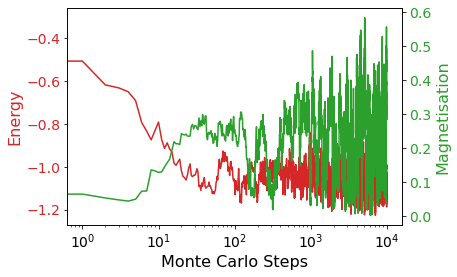

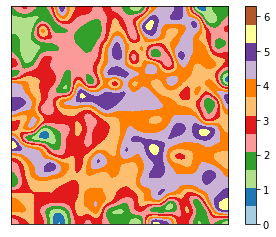

In [508]:
spin.plot_timeseries()
spin.spatial_imag(intp='bicubic')

In [509]:
spin.windcalculation()


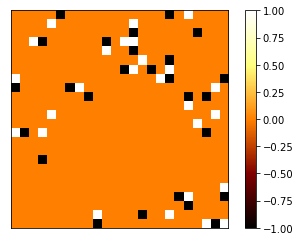

In [510]:
wns = np.array(spin.winding_num).reshape(L,L)*2
plt.imshow(wns,origin='lower',cmap='afmhot')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

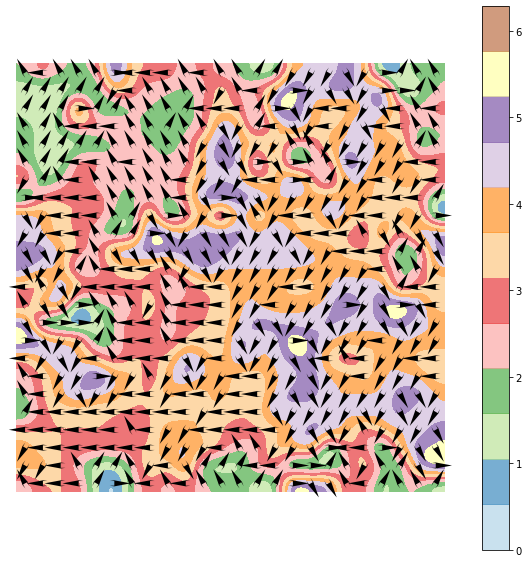

In [512]:
spin.angle_plot_arrow(lattfig_flag=1,wnd_flag=0)



To calculate the winding number we have to calculate the close integral of the gradient of the angle $\theta$. 
In a lattice the integral can be replaced by sum, the close integral is replaced by the sum over all the nearest
neighbour. The formula for the winding number can be reduced to.
\begin{eqnarray}
\int &=& \sum_{i \in n.n.\{i\}} \\
\nabla \theta &=&  \theta_{i} - \theta_{j} \\
\int \frac{\nabla \theta}{2 \pi} d \theta &=& \frac{1}{2\pi}\sum_{i}(\theta_{i}-\theta_{j})\\
\end{eqnarray}
* Before calculating the difference we have to do normalize our phase such that we are in the range $[ -\pi,\pi]$.
* Let $\theta_{max}$ is the maxium value of the theta and $\theta_{min} > 0$ minimum value of theta.
* The normalization process should lead to $\theta_{max}\rightarrow \pi$ and $\theta_{min} \rightarrow -\pi$
    * First we need to ensure that $\theta$ is centered around 0. 
    * To do so we redefine $\tilde{\theta} \rightarrow \theta - \frac{(\theta_{max}+\theta_{min})}{2}$
$$\tilde{\theta} \rightarrow \frac{\tilde{ \pi \theta}}{\sum{\tilde{\theta}}}$$
    * These set of transformations will ensure that the $\theta_{i}$ will be in the range $\theta_{i} \in [-\pi,\pi]$ and also
    $\theta_{i}-\theta_{j} \in [-\pi,\pi]$



In [ ]:
### since the transition probability depends on theta and delta ongle 
### thus we can calculate values for all possible combinations
### the values will be stored in a dictionary with one key to access angle theta and 
### another to access delta

def prob_init(thetas,deltas):
    prob_dict = {}
    prob_acc = {}
    for angle_theta in thetas:
        delta_dict={}
        for angle_delta in deltas:
            delta_dict[angle_delta] = np.cos(angle_theta-angle_delta)
        prob_dict[angle_theta]=delta_dict
    return prob_dict

prob_acc = prob_init(thetas,deltas)


In [ ]:
### this function is used to expand the clusters
### along a random field direction and using a site
def cluster_exp(sitei,field,right,left,up,down,theta,site_theta,prob_dict):
    # a boolean array to store information if the
    # site is added to cluster or not this information
    # will be used later when adding the site to the cluster
    cluster_bool = np.zeros(n_sites,dtype='int') 
    cluster_bool[site] = 1
    
    add_site(sitei,right,left,up,down,theta,field,prob_dict,cluster_bool)
    
    
### this function will add a site to cluster
### first it will check if the corresponding site is already part of the cluster 
### if the site is not part of the cluste then only it is added to the cluster
### after a site is added to the cluster attempts are made to add neighbors of that
### site into the cluster.
    
    
            
def add_site(sitei,right,left,up,down,theta,field,prob_dict=prob_acc,cluster_bool):
    
    ### trying to add the spin in the right neighbour of i in the cluster
    if (cluster_bool[right[sitei]]!=1):
        prob_fac = prob_dict[theta[right[sitei]]][field]*prob_dict[theta[sitei]][field]
        accep = 1.0-np.exp(min(0,prob_fac))
        if (np.random.random() < accep):
            cluster_bool[right[sitei]] = 1
            return add_site(right[sitei],right,left,up,down,theta,field,prob_dict,cluster_bool)
            
    ### trying to add the spin in the left neighbour of i in the cluster
    elif (cluster_bool[left[sitei]]!=1):
        prob_fac = prob_dict[theta[left[sitei]]][field]*prob_dict[theta[sitei]][field]
        accep = 1.0 - np.exp(min(0,prob_fac))
        if (np.random.random() < accep):
            cluster_bool[left[sitei]] = 1
            return add_site(left[sitei],right,left,up,down,theta,field,prob_dict,cluster_bool)
    
    ### trying to add the spin in the up direction of i in the cluster
    elif(cluster_bool[up[sitei]]!=1):
        prob_fac = prob_dict[theta[up[sitei]]][field]*prob_dict[theta[sitei]][field]
        accep = 1.0 - np.exp(min(0,prob_fac))
        if (np.random.random() < accep):
            cluster_bool[up[sitei]] = 1
            return add_site(up[sitei],right,left,up,down,theta,field,prob_dict,cluster_bool)
    
    ### trying to add the spin in the down direction of site i in the cluster
    elif(cluster_bool[down[sitej]]!=1):
        prob_fac = prob_dict[theta[down[sitej]]][field]*prob_dict[theta[sitei]][field]
        accep = 1.0 - np.exp(min(0,prob_fac))
        if (np.random.random() < accep):
            cluster_bool[down[sitej]] = 1
            return add_site(down[sitej],right,left,up,down,theta,field,prob_dict,cluster_bool)
    
    return #cluster_bool


    

In [ ]:
def single_flipmc(site,field,right,left,up,down,prob_acc,site_theta,temp):
#    fac_site = prob_acc[site_theta[site]][field]
#    fac_rsite = prob_acc[site_theta[right[site]]][field]
#    fac_lsite = prob_acc[site_theta[left[site]]][field]
#    fac_usite = prob_acc[site_theta[up[site]]][field]
#    fac_dsite = prob_acc[site_theta[down[site]]][field]
    
    
    fac_site = np.cos(site_theta[site]-field)
    fac_rsite = np.cos(site_theta[right[site]]-field)
    fac_lsite = np.cos(site_theta[left[site]] -field)
    fac_usite = np.cos(site_theta[up[site]] - field)
    fac_dsite = np.cos(site_theta[down[site]] -field)
    
    
    delE = 2*J*fac_site* (fac_rsite + fac_lsite + fac_usite + fac_dsite)
    #print(delE)
    if (delE<0.0):
        site_theta[site] = (np.pi - site_theta[site] + 2 * field)%(2*np.pi)
    else:
        rand = np.random.uniform()
        prob=np.exp(-delE/temp)
        
        if (rand<prob):
            site_theta[site] = (np.pi - site_theta[site] + 2 * field)%(2*np.pi)
    return 



def enr_calc(site_theta,right,left,up,down):
    enr = 0.0
    for i in range(n_sites):
        ri = right[i];li = left[i];ui = up[i];di = down[i]
        eri = np.cos(site_theta[i]-site_theta[ri]);eli = np.cos(site_theta[i]-site_theta[li])
        eui = np.cos(site_theta[i]-site_theta[ui]);edi = np.cos(site_theta[i]-site_theta[di])
        enr += -0.5*J*(eri + eli + eui + edi)
    return enr/n_sites

np.random.seed(1)
temp = 3.0
enri = []
for j in range(n_equil):
    rand_sites = choice(sites,size=n_sites)
    field_dirctn = choice(deltas,size=n_sites)
    #print(rand_sites,field_dirctn)
    for site, field in zip(rand_sites,field_dirctn):
        single_flipmc(site,field,right,left,up,down,prob_acc,site_theta,temp)
        #enri.append(enr_calc(site_theta,right,left,up,down))

#plt.plot(enri)
#plt.show()
print("hello done")
